### Data Dictionary

The variables in the dataset quality.csv are as follows:

    MemberID numbers the patients from 1 to 131, and is just an identifying number.
    InpatientDays is the number of inpatient visits, or number of days the person spent in the hospital.
    ERVisits is the number of times the patient visited the emergency room.
    OfficeVisits is the number of times the patient visited any doctor's office.
    Narcotics is the number of prescriptions the patient had for narcotics.
    DaysSinceLastERVisit is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER). 
    Pain is the number of visits for which the patient complained about pain.
    TotalVisits is the total number of times the patient visited any healthcare provider.
    ProviderCount is the number of providers that served the patient.
    MedicalClaims is the number of days on which the patient had a medical claim.
    ClaimLines is the total number of medical claims.
    StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
    AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out.
    PoorCare is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.



### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("quality.csv")

In [3]:
df

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731,10,18,21,93,222,0,0,0
1,2,1,1,6,1,411,0,8,27,19,115,0,1,0
2,3,0,0,5,3,731,10,5,16,27,148,0,5,0
3,4,0,1,19,0,158,34,20,14,59,242,0,0,0
4,5,8,2,19,3,449,10,29,24,51,204,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,127,1,1,5,3,444,0,7,11,11,36,0,0,0
127,128,1,0,3,2,731,0,4,35,18,106,0,2,0
128,129,15,11,5,9,181,95,31,56,43,265,0,3,0
129,130,0,2,14,1,217,5,16,26,41,138,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MemberID              131 non-null    int64
 1   InpatientDays         131 non-null    int64
 2   ERVisits              131 non-null    int64
 3   OfficeVisits          131 non-null    int64
 4   Narcotics             131 non-null    int64
 5   DaysSinceLastERVisit  131 non-null    int64
 6   Pain                  131 non-null    int64
 7   TotalVisits           131 non-null    int64
 8   ProviderCount         131 non-null    int64
 9   MedicalClaims         131 non-null    int64
 10  ClaimLines            131 non-null    int64
 11  StartedOnCombination  131 non-null    int64
 12  AcuteDrugGapSmall     131 non-null    int64
 13  PoorCare              131 non-null    int64
dtypes: int64(14)
memory usage: 14.5 KB


In [5]:
df.describe(include='all')

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.572519,15.557252,17.442748,23.984733,43.244275,142.862595,0.045802,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.764431,20.418001,12.298318,13.670285,28.886540,91.629921,0.209857,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,207.000000,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,641.000000,8.000000,15.000000,20.000000,37.000000,120.000000,0.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,0.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,1.000000,71.000000,1.000000


In [6]:
df.shape

(131, 14)

In [7]:
df.columns

Index(['MemberID', 'InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

### Data Visualization

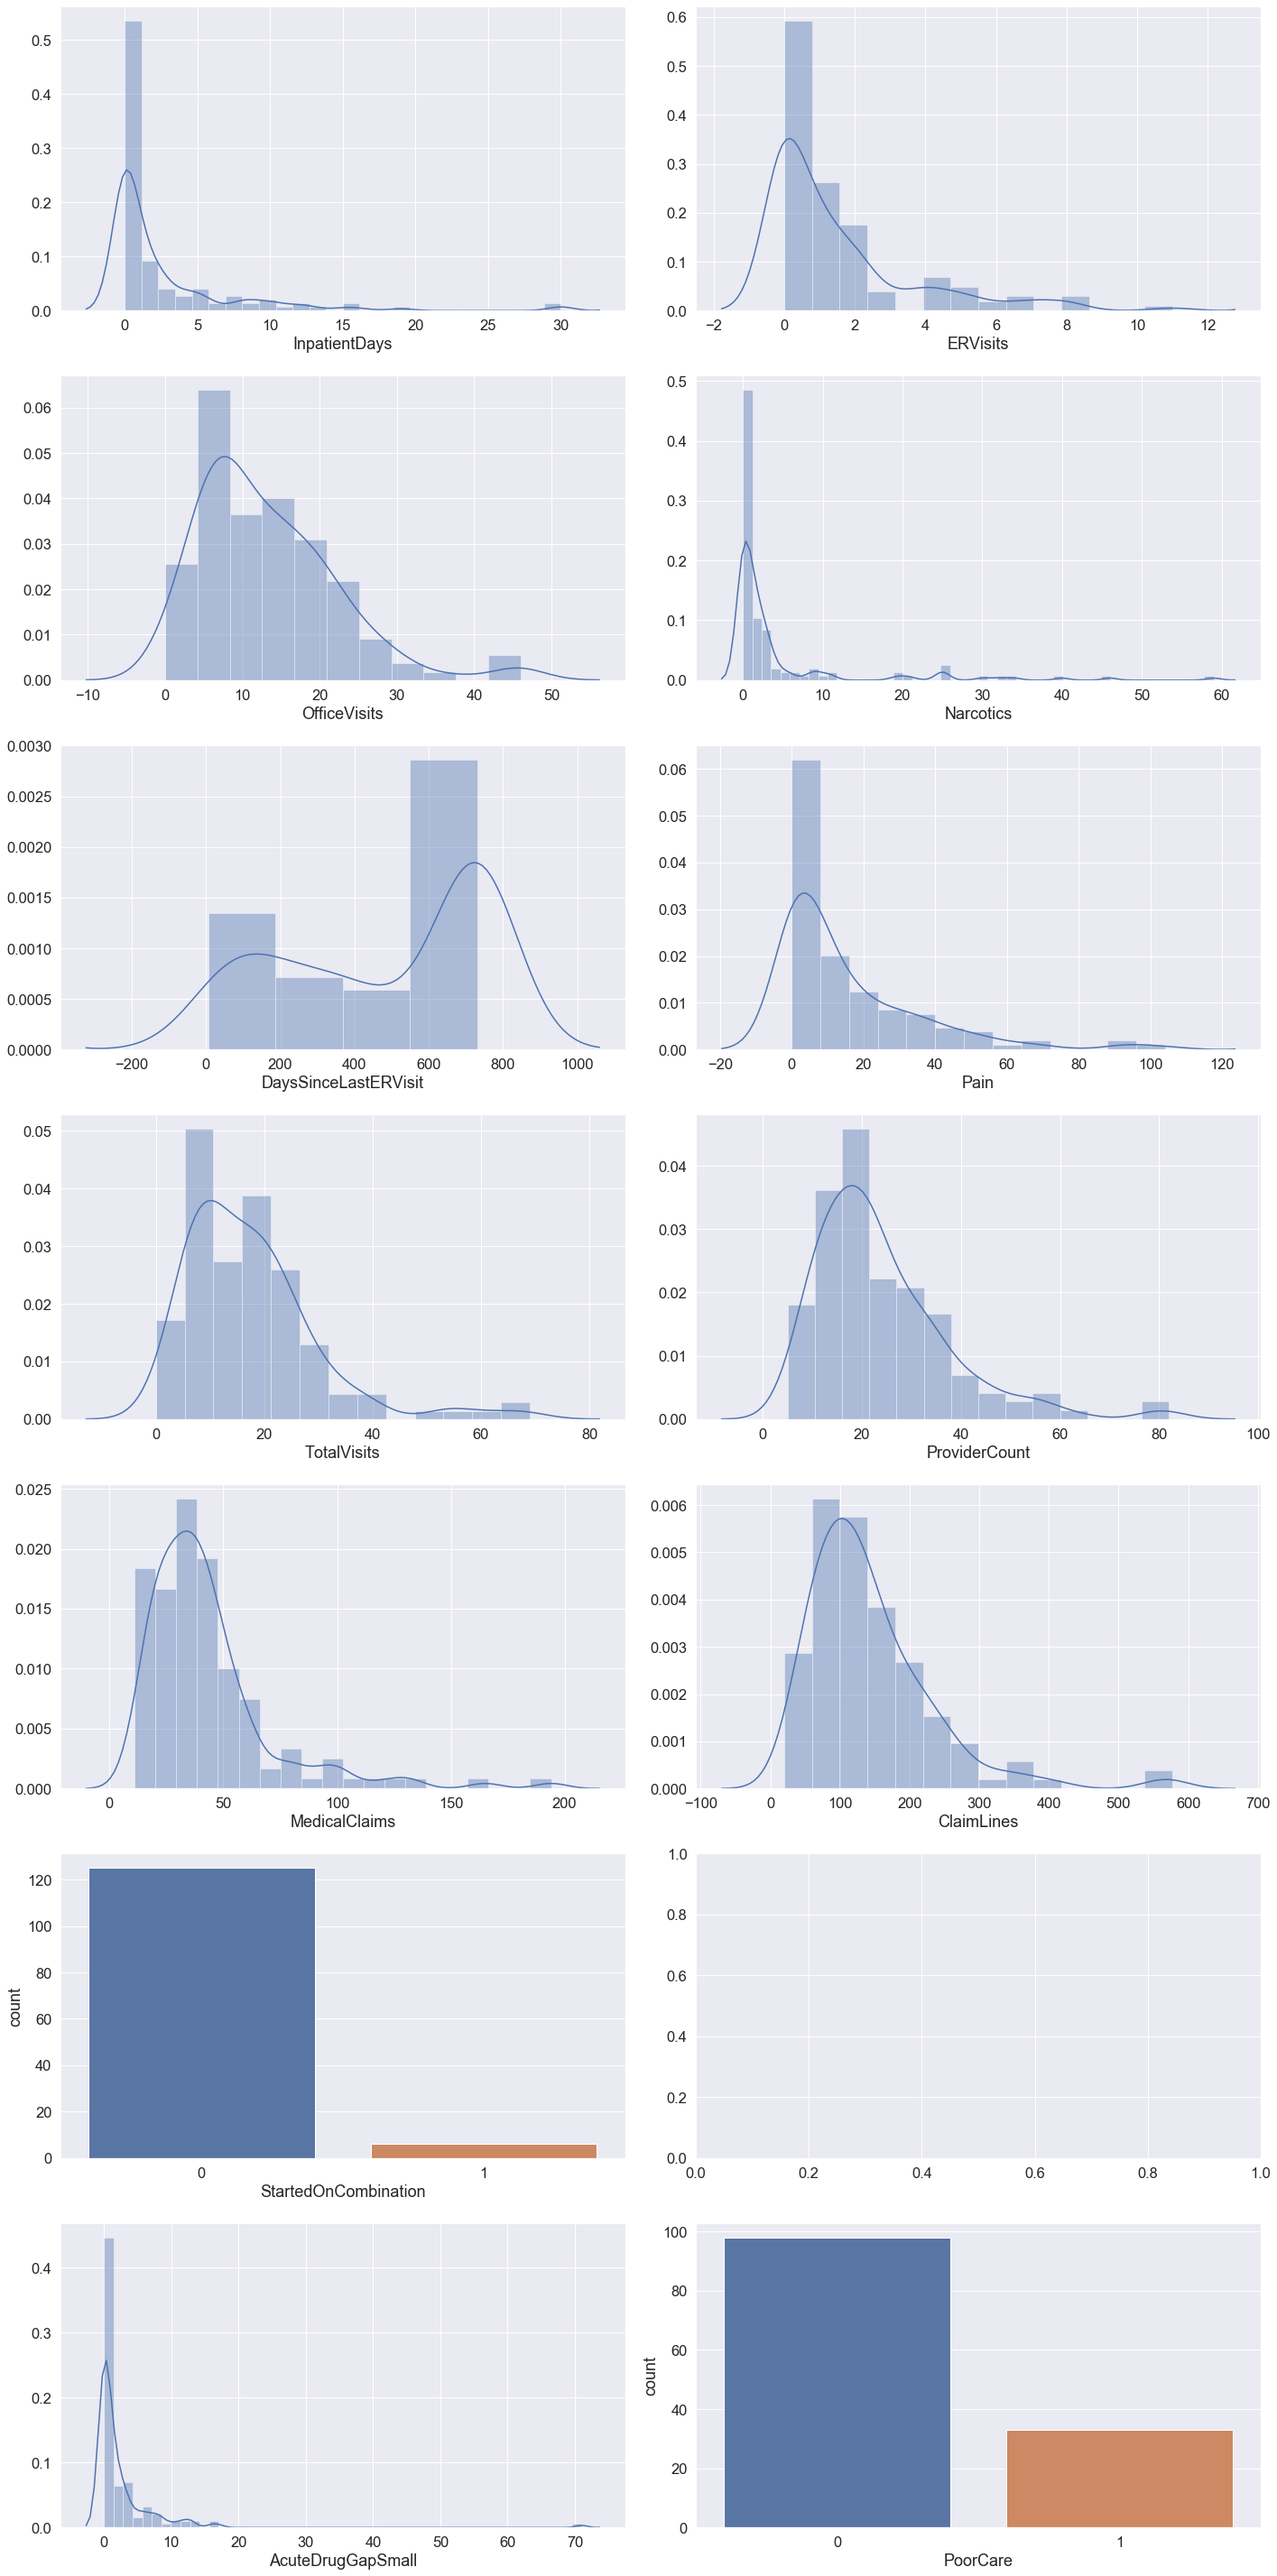

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.InpatientDays)
plt.subplot(7,2,2)
sns.distplot(df.ERVisits)
plt.subplot(7,2,3)
sns.distplot(df.OfficeVisits)
plt.subplot(7,2,4)
sns.distplot(df.Narcotics)
plt.subplot(7,2,5)
sns.distplot(df.DaysSinceLastERVisit)
plt.subplot(7,2,6)
sns.distplot(df.Pain)
plt.subplot(7,2,7)
sns.distplot(df.TotalVisits)
plt.subplot(7,2,8)
sns.distplot(df.ProviderCount)
plt.subplot(7,2,9)
sns.distplot(df.MedicalClaims)
plt.subplot(7,2,10)
sns.distplot(df.ClaimLines)
plt.subplot(7,2,11)
sns.countplot(df.StartedOnCombination)
plt.subplot(7,2,12)
#sns.countplot()
plt.subplot(7,2,13)
sns.distplot(df.AcuteDrugGapSmall)
plt.subplot(7,2,14)
sns.countplot(df.PoorCare)

plt.tight_layout()
plt.show()

In [9]:
df['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [10]:
df.corr()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
MemberID,1.000000,-0.063620,-0.011032,-0.006273,0.203962,0.100177,0.023700,-0.032954,0.012511,-0.065212,-0.090459,-0.144841,0.196651,0.060916
InpatientDays,-0.063620,1.000000,0.440087,0.175901,-0.093769,-0.290119,0.304058,0.622036,0.244023,0.286378,0.386951,0.105626,-0.001144,0.080726
ERVisits,-0.011032,0.440087,1.000000,0.308526,-0.003732,-0.735248,0.546779,0.586439,0.457429,0.355319,0.542001,0.118766,-0.072750,0.135401
OfficeVisits,-0.006273,0.175901,0.308526,1.000000,0.275759,-0.128386,0.352968,0.865387,0.365469,0.498513,0.424953,0.164056,0.200735,0.329512
Narcotics,0.203962,-0.093769,-0.003732,0.275759,1.000000,0.065050,0.106860,0.163992,0.293478,0.220541,0.185799,0.043641,0.710889,0.447236
DaysSinceLastERVisit,0.100177,-0.290119,-0.735248,-0.128386,0.065050,1.000000,-0.358779,-0.344638,-0.297699,-0.198113,-0.412794,-0.061958,0.131084,-0.107988
Pain,0.023700,0.304058,0.546779,0.352968,0.106860,-0.358779,1.000000,0.482959,0.405095,0.296697,0.464713,0.078373,-0.031490,0.092168
TotalVisits,-0.032954,0.622036,0.586439,0.865387,0.163992,-0.344638,0.482959,1.000000,0.451545,0.549308,0.569619,0.185814,0.134861,0.300540
ProviderCount,0.012511,0.244023,0.457429,0.365469,0.293478,-0.297699,0.405095,0.451545,1.000000,0.517002,0.605357,0.155765,0.141284,0.220166
MedicalClaims,-0.065212,0.286378,0.355319,0.498513,0.220541,-0.198113,0.296697,0.549308,0.517002,1.000000,0.813935,0.067931,0.085637,0.167399


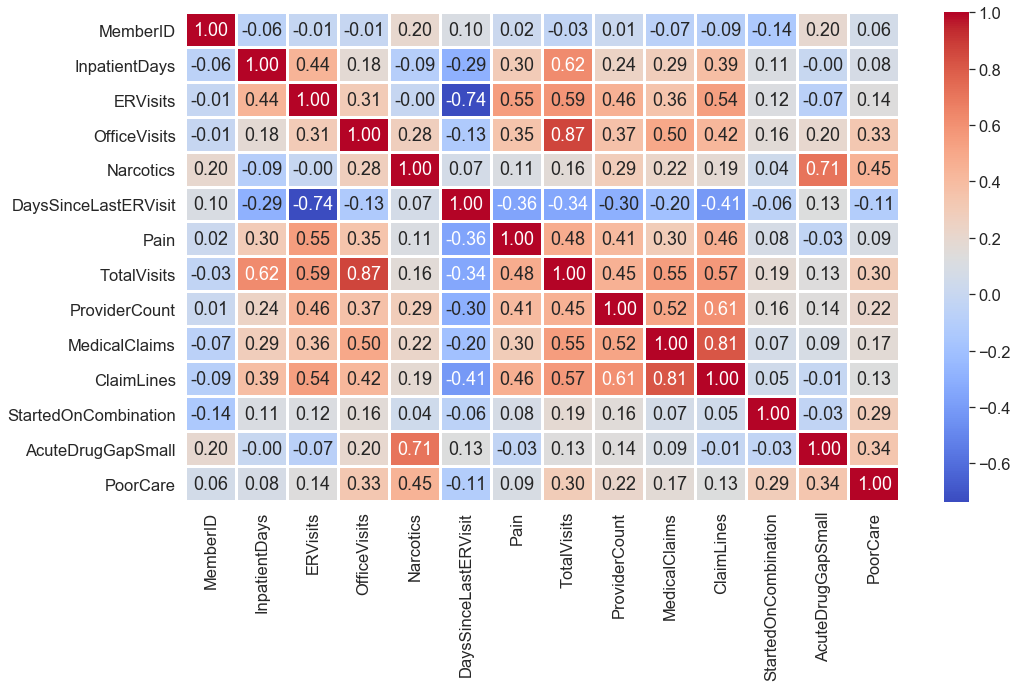

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

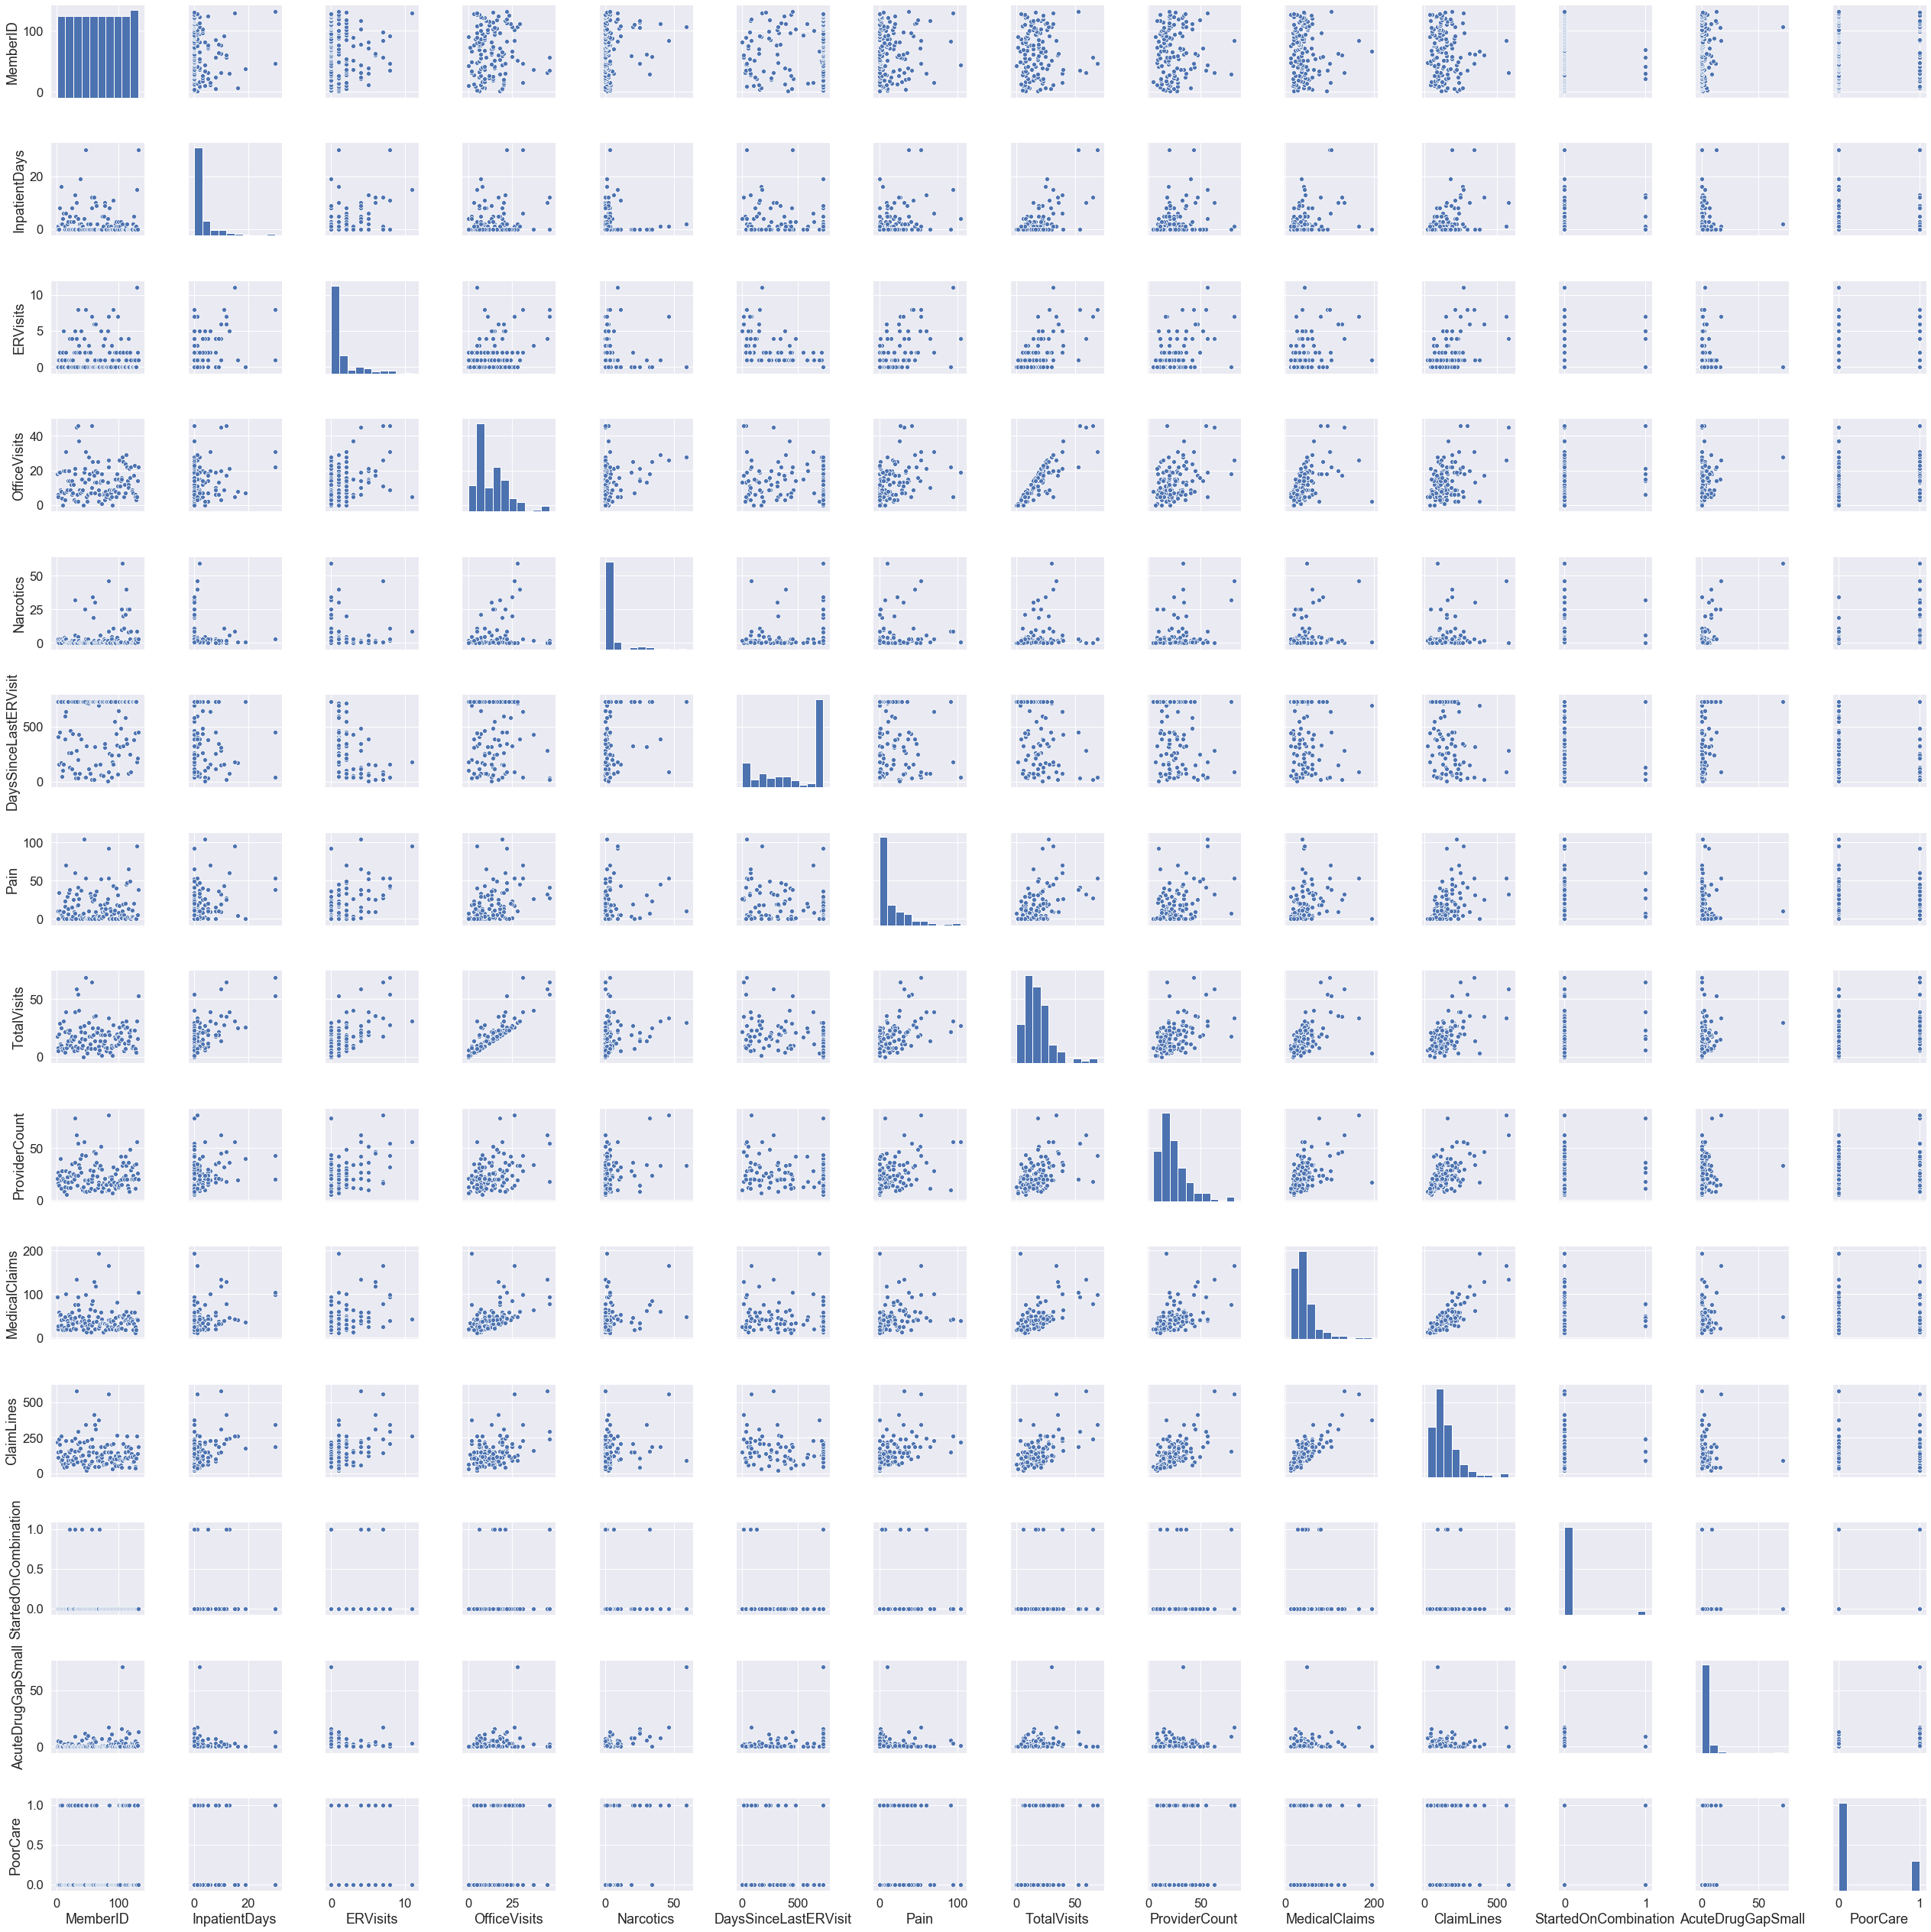

In [12]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

MemberID                0
InpatientDays           0
ERVisits                0
OfficeVisits            0
Narcotics               0
DaysSinceLastERVisit    0
Pain                    0
TotalVisits             0
ProviderCount           0
MedicalClaims           0
ClaimLines              0
StartedOnCombination    0
AcuteDrugGapSmall       0
PoorCare                0
dtype: int64

### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

### Treat Imbalance Data

### Treat Outliers

In [15]:
df.columns

Index(['MemberID', 'InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

In [16]:
df.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.572519,15.557252,17.442748,23.984733,43.244275,142.862595,0.045802,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.764431,20.418001,12.298318,13.670285,28.886540,91.629921,0.209857,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,207.000000,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,641.000000,8.000000,15.000000,20.000000,37.000000,120.000000,0.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,0.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,1.000000,71.000000,1.000000


In [17]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines','AcuteDrugGapSmall'])

In [18]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
                      'DaysSinceLastERVisit', 'Pain', 'TotalVisits',
                      'ProviderCount', 'MedicalClaims', 'ClaimLines',
                      'AcuteDrugGapSmall'])

In [19]:
df2 = windsorizer.transform(df)

In [20]:
df2

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0.0,0.0,18.0,1.0,731.0,10.0,18.00,21.0,85.5,222.0,0,0.0,0
1,2,1.0,1.0,6.0,1.0,411.0,0.0,8.00,27.0,19.0,115.0,0,1.0,0
2,3,0.0,0.0,5.0,3.0,731.0,10.0,5.00,16.0,27.0,148.0,0,5.0,0
3,4,0.0,1.0,19.0,0.0,158.0,34.0,20.00,14.0,59.0,242.0,0,0.0,0
4,5,7.5,2.0,19.0,3.0,449.0,10.0,29.00,24.0,51.0,204.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,127,1.0,1.0,5.0,3.0,444.0,0.0,7.00,11.0,11.0,36.0,0,0.0,0
127,128,1.0,0.0,3.0,2.0,731.0,0.0,4.00,35.0,18.0,106.0,0,2.0,0
128,129,7.5,5.0,5.0,7.5,181.0,56.0,31.00,52.5,43.0,265.0,0,3.0,0
129,130,0.0,2.0,14.0,1.0,217.0,5.0,16.00,26.0,41.0,138.0,0,1.0,1


In [21]:
df2.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,1.931298,1.320611,12.992366,2.145038,480.572519,14.412214,16.841603,23.404580,40.396947,138.408397,0.045802,1.847328,0.251908
std,37.960506,2.680244,1.683710,8.325236,2.630069,274.764431,16.751060,10.362850,11.832828,19.965905,75.881158,0.209857,2.574201,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,207.000000,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,641.000000,8.000000,15.000000,20.000000,37.000000,120.000000,0.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,0.000000,3.000000,0.500000
max,131.000000,7.500000,5.000000,35.750000,7.500000,731.000000,56.000000,44.250000,52.500000,85.500000,337.250000,1.000000,7.500000,1.000000


In [22]:
windsorizer.left_tail_caps_

{'InpatientDays': -4.5,
 'ERVisits': -3.0,
 'OfficeVisits': -10.25,
 'Narcotics': -4.5,
 'DaysSinceLastERVisit': -579.0,
 'Pain': -32.0,
 'TotalVisits': -13.75,
 'ProviderCount': -7.5,
 'MedicalClaims': -10.5,
 'ClaimLines': -68.75,
 'AcuteDrugGapSmall': -4.5}

In [23]:
windsorizer.right_tail_caps_

{'InpatientDays': 7.5,
 'ERVisits': 5.0,
 'OfficeVisits': 35.75,
 'Narcotics': 7.5,
 'DaysSinceLastERVisit': 1517.0,
 'Pain': 56.0,
 'TotalVisits': 44.25,
 'ProviderCount': 52.5,
 'MedicalClaims': 85.5,
 'ClaimLines': 337.25,
 'AcuteDrugGapSmall': 7.5}

### Treat Data Types

### Drop unwanted features

In [24]:
df2.columns

Index(['MemberID', 'InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

In [25]:
df2.drop(['MemberID'],axis=1,inplace=True)

In [26]:
df2

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,0.0,0.0,18.0,1.0,731.0,10.0,18.00,21.0,85.5,222.0,0,0.0,0
1,1.0,1.0,6.0,1.0,411.0,0.0,8.00,27.0,19.0,115.0,0,1.0,0
2,0.0,0.0,5.0,3.0,731.0,10.0,5.00,16.0,27.0,148.0,0,5.0,0
3,0.0,1.0,19.0,0.0,158.0,34.0,20.00,14.0,59.0,242.0,0,0.0,0
4,7.5,2.0,19.0,3.0,449.0,10.0,29.00,24.0,51.0,204.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1.0,1.0,5.0,3.0,444.0,0.0,7.00,11.0,11.0,36.0,0,0.0,0
127,1.0,0.0,3.0,2.0,731.0,0.0,4.00,35.0,18.0,106.0,0,2.0,0
128,7.5,5.0,5.0,7.5,181.0,56.0,31.00,52.5,43.0,265.0,0,3.0,0
129,0.0,2.0,14.0,1.0,217.0,5.0,16.00,26.0,41.0,138.0,0,1.0,1


### Train Test Split

In [27]:
X = df2.iloc[:,0:12]
y = df2.iloc[:,12]

In [28]:
X.values, y.values

(array([[  0. ,   0. ,  18. , ..., 222. ,   0. ,   0. ],
        [  1. ,   1. ,   6. , ..., 115. ,   0. ,   1. ],
        [  0. ,   0. ,   5. , ..., 148. ,   0. ,   5. ],
        ...,
        [  7.5,   5. ,   5. , ..., 265. ,   0. ,   3. ],
        [  0. ,   2. ,  14. , ..., 138. ,   0. ,   1. ],
        [  7.5,   1. ,  22. , ..., 189. ,   0. ,   7.5]]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       dtype=int64))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104, 12), (27, 12), (104,), (27,))

### Feature Scaling

In [31]:
X_train

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall
118,0.0,1.0,22.0,7.5,87.0,0.0,23.0,29.0,44.0,176.0,0,1.0
68,0.0,0.0,6.0,0.0,731.0,3.0,6.0,31.0,27.0,89.0,1,0.0
16,2.0,0.0,9.0,0.0,731.0,29.0,11.0,22.0,39.0,120.0,0,0.0
96,1.0,1.0,18.0,4.0,330.0,18.0,20.0,30.0,81.0,270.0,0,0.0
122,2.0,0.0,7.0,1.0,731.0,2.0,9.0,24.0,18.0,79.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,5.0,5.0,7.5,181.0,56.0,31.0,52.5,43.0,265.0,0,3.0
123,5.0,1.0,17.0,0.0,380.0,20.0,23.0,20.0,32.0,84.0,0,1.0
67,0.0,0.0,9.0,2.0,731.0,3.0,9.0,15.0,21.0,47.0,0,0.0
117,0.0,2.0,16.0,3.0,248.0,49.0,18.0,49.0,41.0,120.0,0,0.0


In [32]:
minmax = MinMaxScaler()

In [33]:
X_train_scaled = minmax.fit_transform(X_train)

In [34]:
X_test_scaled = minmax.transform(X_test)

In [35]:
X_test_scaled

array([[0.26666667, 0.2       , 0.11188811, 0.4       , 0.0537931 ,
        0.08928571, 0.15819209, 0.48421053, 0.12080537, 0.24586288,
        0.        , 0.        ],
       [0.        , 0.2       , 0.36363636, 1.        , 0.43448276,
        0.55357143, 0.31638418, 0.61052632, 0.68456376, 1.        ,
        0.        , 0.8       ],
       [1.        , 1.        , 0.25174825, 1.        , 0.21241379,
        0.76785714, 0.63276836, 0.56842105, 0.36241611, 0.5894405 ,
        0.        , 0.26666667],
       [0.        , 0.4       , 0.6993007 , 1.        , 0.44275862,
        0.33928571, 0.61016949, 0.65263158, 0.46979866, 0.5894405 ,
        0.        , 0.4       ],
       [0.66666667, 0.        , 0.5034965 , 0.13333333, 1.        ,
        0.23214286, 0.51977401, 0.52631579, 0.41610738, 0.29944838,
        0.        , 0.93333333],
       [0.66666667, 0.4       , 0.05594406, 0.        , 0.03310345,
        0.        , 0.20338983, 0.4       , 0.10738255, 0.27738377,
        0.        ,

### Create and save processed dataset

### Model Training

### Using XGBoost

In [36]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [37]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=30)

[0]	validation_0-error:0.148148
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.148148
[2]	validation_0-error:0.148148
[3]	validation_0-error:0.148148
[4]	validation_0-error:0.185185
[5]	validation_0-error:0.148148
[6]	validation_0-error:0.148148
[7]	validation_0-error:0.185185
[8]	validation_0-error:0.185185
[9]	validation_0-error:0.185185
[10]	validation_0-error:0.148148
[11]	validation_0-error:0.148148
[12]	validation_0-error:0.148148
[13]	validation_0-error:0.148148
[14]	validation_0-error:0.148148
[15]	validation_0-error:0.185185
[16]	validation_0-error:0.148148
[17]	validation_0-error:0.185185
[18]	validation_0-error:0.185185
[19]	validation_0-error:0.185185
[20]	validation_0-error:0.185185
[21]	validation_0-error:0.185185
[22]	validation_0-error:0.185185
[23]	validation_0-error:0.185185
[24]	validation_0-error:0.185185
[25]	validation_0-error:0.185185
[26]	validation_0-error:0.185185
[27]	validation_0-error:0.185185
[28]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
y_pred = xgbmodel.predict(X_test_scaled)

In [39]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

### Model Evaluation

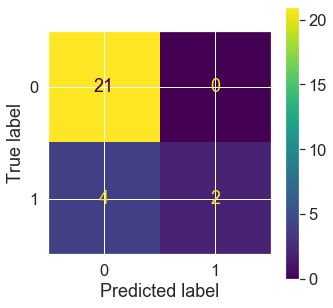

In [40]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.33      0.50         6

    accuracy                           0.85        27
   macro avg       0.92      0.67      0.71        27
weighted avg       0.88      0.85      0.82        27



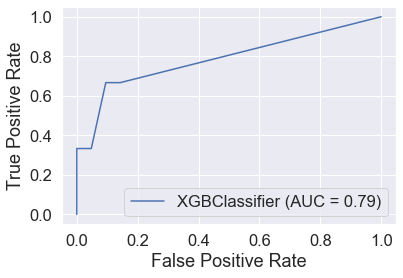

In [42]:
plot_roc_curve(xgbmodel,X_test_scaled,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

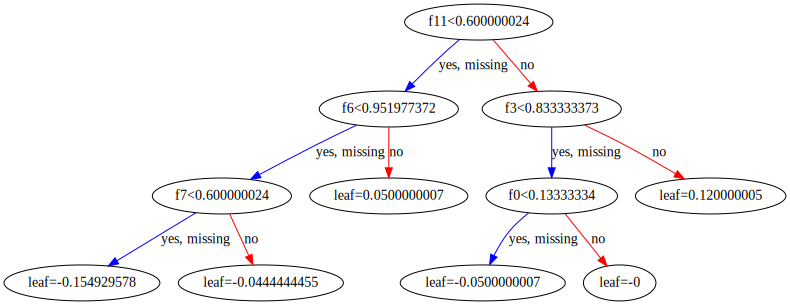

In [46]:
xgb.to_graphviz(booster=xgbmodel)

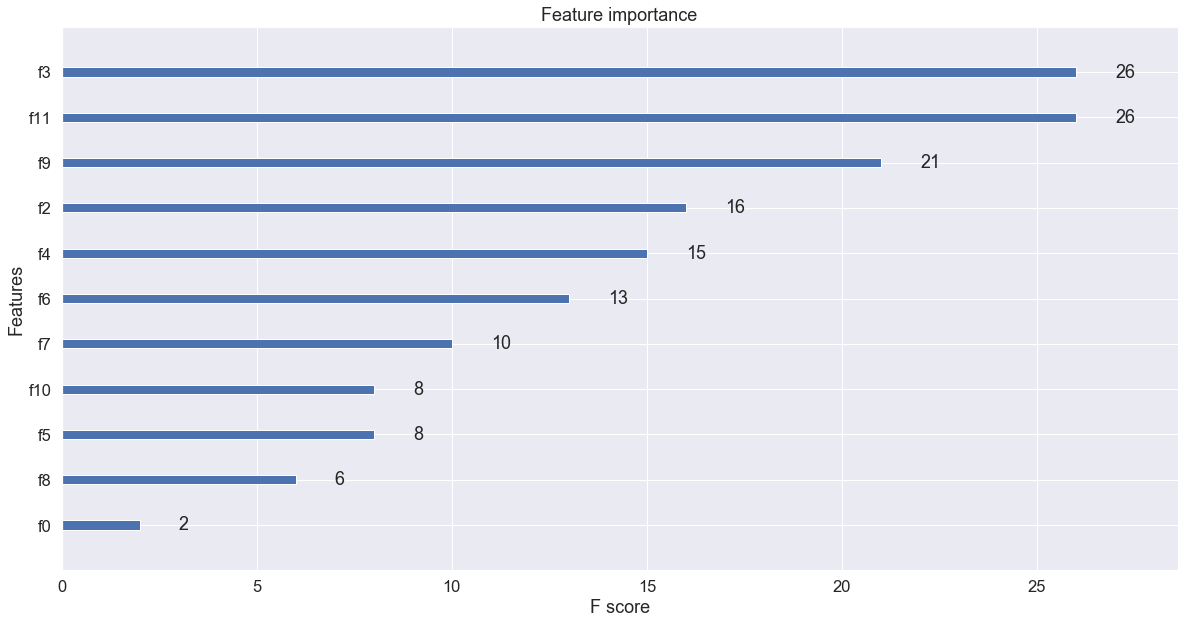

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
plot_importance(xgbmodel,ax=ax)
plt.show()

In [48]:
xgbmodel.feature_importances_

array([0.04132958, 0.        , 0.09312238, 0.07085132, 0.09665078,
       0.03976371, 0.1250454 , 0.07689997, 0.07722216, 0.07983792,
       0.0969055 , 0.20237127], dtype=float32)

In [49]:
featureimpt = pd.DataFrame(xgbmodel.feature_importances_,columns=['Score'])

In [50]:
featureimpt

,Score
0,0.041330
1,0.000000
2,0.093122
3,0.070851
4,0.096651
5,0.039764
6,0.125045
7,0.076900
8,0.077222
9,0.079838


In [51]:
featurecols = pd.DataFrame(X_train.columns,columns=['Feature Names'])

In [52]:
featurecols

,Feature Names
0,InpatientDays
1,ERVisits
2,OfficeVisits
3,Narcotics
4,DaysSinceLastERVisit
5,Pain
6,TotalVisits
7,ProviderCount
8,MedicalClaims
9,ClaimLines


In [53]:
featureresult = pd.concat([featurecols,featureimpt],axis=1)

In [54]:
featureresult.sort_values(by='Score',ascending=False,inplace=True)

In [55]:
featureresult

,Feature Names,Score
11,AcuteDrugGapSmall,0.202371
6,TotalVisits,0.125045
10,StartedOnCombination,0.096905
4,DaysSinceLastERVisit,0.096651
2,OfficeVisits,0.093122
9,ClaimLines,0.079838
8,MedicalClaims,0.077222
7,ProviderCount,0.076900
3,Narcotics,0.070851
0,InpatientDays,0.041330


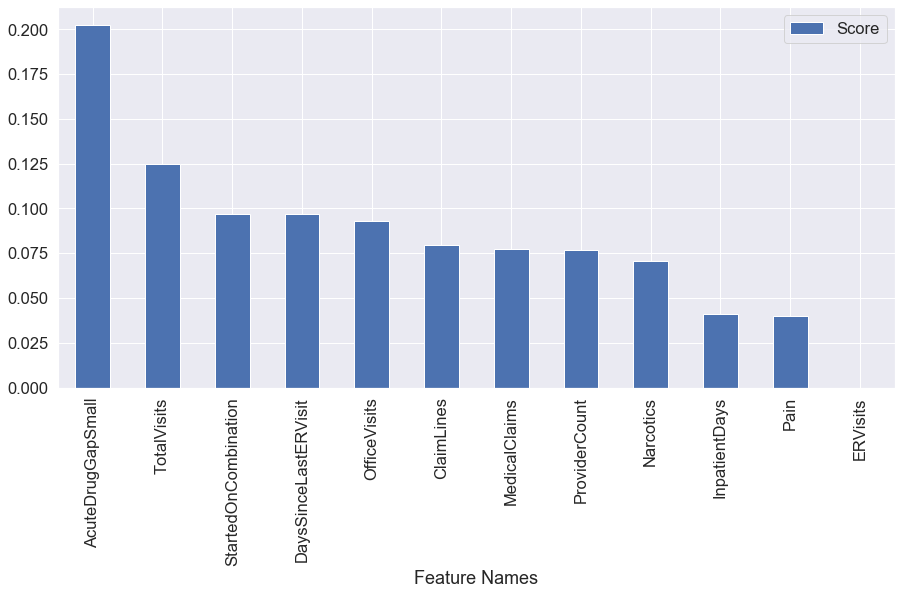

In [56]:
featureresult.plot(kind='bar',x='Feature Names',y='Score',figsize=(15,7))
plt.show()

In [57]:
xgbmodel.get_booster().get_fscore()

{'f11': 26,
 'f6': 13,
 'f7': 10,
 'f3': 26,
 'f0': 2,
 'f2': 16,
 'f4': 15,
 'f8': 6,
 'f9': 21,
 'f5': 8,
 'f10': 8}

In [58]:
X.columns

Index(['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall'],
      dtype='object')

In [59]:
xgbmodel.get_booster().feature_names = ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall']

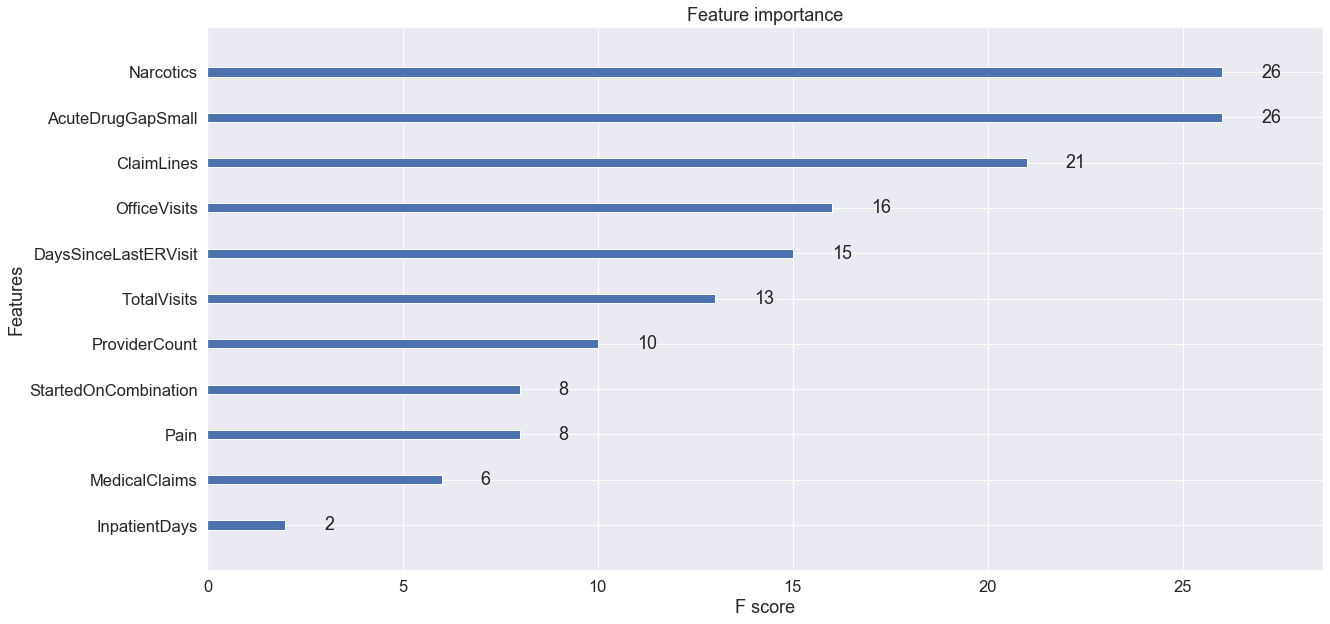

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

Example:

f = 'gain'

XGBClassifier.get_booster().get_score(importance_type= f)

### Cross-Validation

In [61]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [62]:
cv.mean()

0.7555555555555555

### Model Tuning

In [63]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [64]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [65]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [66]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [67]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=4,
              learning rate=0.08, learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=2, missing=None, n_estimators=400,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [68]:
randm.best_score_

0.8170940170940172

In [69]:
randm.best_params_

{'subsample': 0.7,
 'n_estimators': 400,
 'min_child_weight': 2,
 'max_depth': 9,
 'learning rate': 0.08,
 'gamma': 4,
 'colsample_bytree': 0.7999999999999999}